In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# EDA

In [18]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
import sheryanalysis as sh 
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (891, 12)
🧱 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🧼 Columns with nulls: ['Age', 'Cabin', 'Embarked']

🔠 Categorical Columns: ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

🔢 Numerical Columns: ['PassengerId', 'Age', 'Fare']

📝 Text Columns: ['Name', 'Ticket', 'Cabin']


{'shape': (891, 12),
 'columns': ['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 'dtypes': {'PassengerId': dtype('int64'),
  'Survived': dtype('int64'),
  'Pclass': dtype('int64'),
  'Name': dtype('O'),
  'Sex': dtype('O'),
  'Age': dtype('float64'),
  'SibSp': dtype('int64'),
  'Parch': dtype('int64'),
  'Ticket': dtype('O'),
  'Fare': dtype('float64'),
  'Cabin': dtype('O'),
  'Embarked': dtype('O')},
 'null_counts': {'PassengerId': 0,
  'Survived': 0,
  'Pclass': 0,
  'Name': 0,
  'Sex': 0,
  'Age': 177,
  'SibSp': 0,
  'Parch': 0,
  'Ticket': 0,
  'Fare': 0,
  'Cabin': 687,
  'Embarked': 2},
 'total_rows': 891,
 'column_types': {'categorical': ['Survived',
   'Pclass',
   'Sex',
   'SibSp',
   'Parch',
   'Embarked'],
  'numerical': ['PassengerId', 'Age', 'Fare'],
  'datetime': [],
  'text': ['Name', 'Ticket', 'Cabin']}}

In [23]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


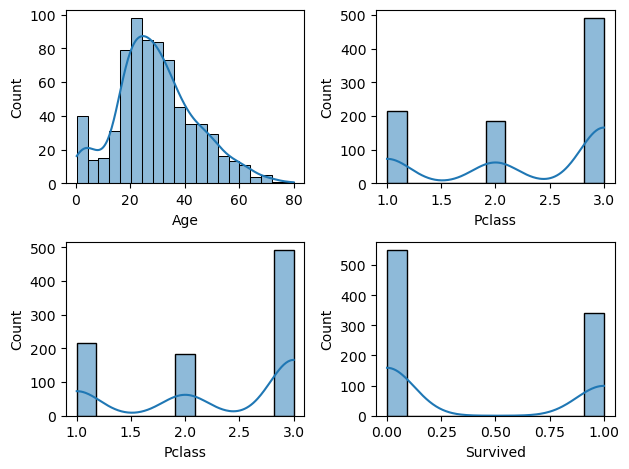

In [29]:
def plotting(var , num):
    plt.subplot(2,2,num)
    sns.histplot(df[var] , kde=True)

plotting('Age' , 1)
plotting('Pclass' , 2)
plotting('Pclass' , 3)
plotting("Survived" , 4)
plt.tight_layout()

<Axes: xlabel='Sex', ylabel='Survived'>

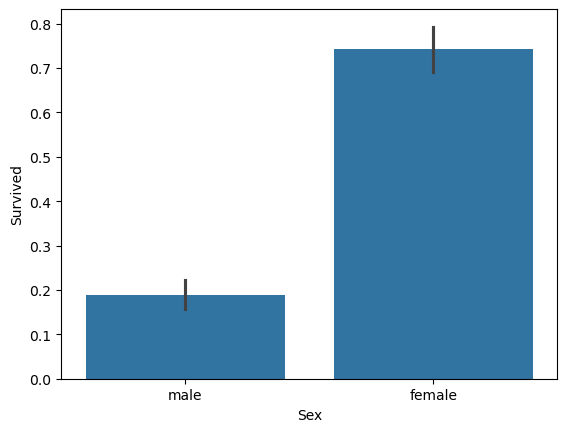

In [30]:
sns.barplot(x=df['Sex'] , y=df['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

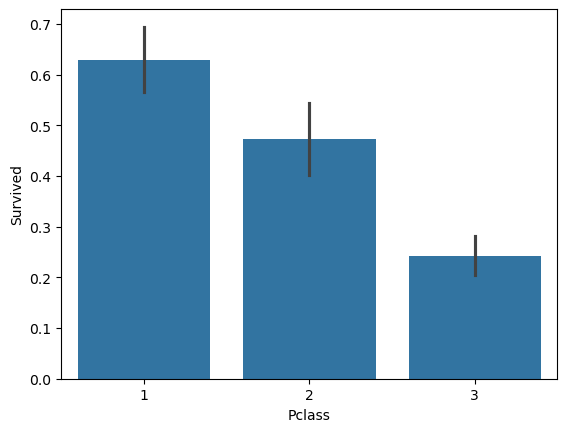

In [31]:
sns.barplot(x=df['Pclass'] , y=df['Survived'])

<Axes: xlabel='SibSp', ylabel='Survived'>

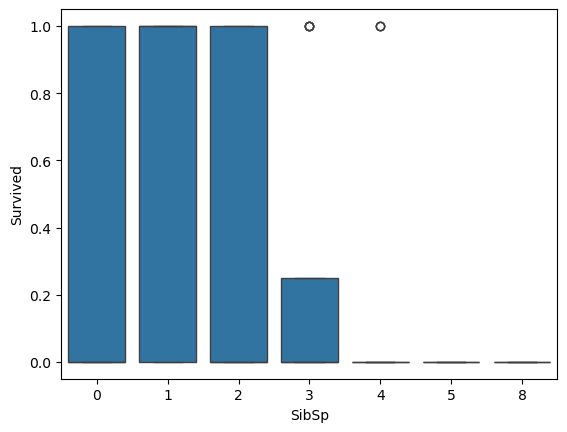

In [32]:
sns.boxplot(x=df['SibSp'] , y=df['Survived'])

<Axes: xlabel='Embarked', ylabel='Survived'>

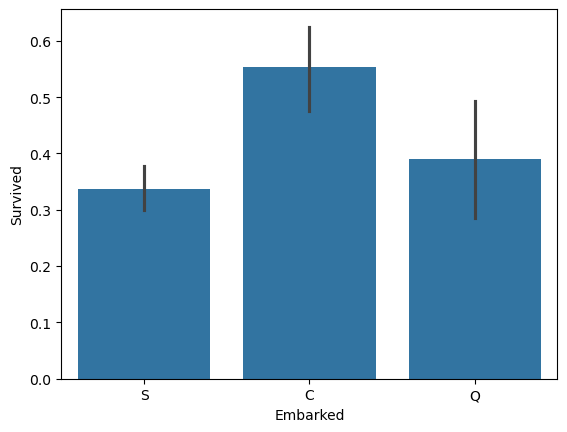

In [37]:
sns.barplot(x=df['Embarked'] , y=df['Survived'])

<Axes: >

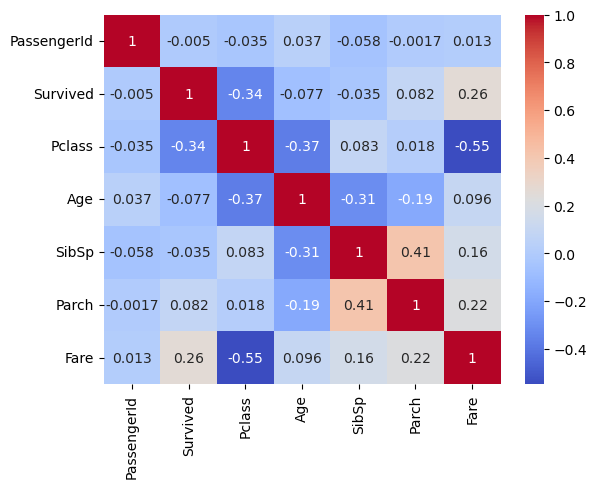

In [39]:
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm')

# Data cleaning and preprocessing

In [41]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [43]:
df.drop(columns=['PassengerId' ,'Name' ] , inplace=True)

In [45]:
def extract_ticket_prefix(ticket):
    parts = ticket.replace('.', '').replace('/', '').split()
    return parts[0] if len(parts) > 1 else 'None'

In [46]:
df['Ticket_Price'] = df['Ticket'].apply(extract_ticket_prefix)

In [49]:
df.drop(columns=['Ticket' , 'Cabin'], inplace=True)

In [51]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [56]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_Price
0,0,3,male,22.0,1,0,7.2500,S,Mr,A5
1,1,1,female,38.0,1,0,71.2833,C,Mrs,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss,STONO2
3,1,1,female,35.0,1,0,53.1000,S,Mrs,None
4,0,3,male,35.0,0,0,8.0500,S,Mr,None


In [61]:
df_encode = df.copy()

In [62]:
cols = ['Sex' , 'Embarked' , 'Title' , 'Ticket_Price']

In [63]:
le = LabelEncoder()
for col in cols:
    df_encode[col] = le.fit_transform(df_encode[col])

In [66]:
df_encode

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_Price
0,0,3,1,22.000000,1,0,7.2500,2,12,1
1,1,1,0,38.000000,1,0,71.2833,0,13,10
2,1,3,0,26.000000,0,0,7.9250,2,9,26
3,1,1,0,35.000000,1,0,53.1000,2,13,9
4,0,3,1,35.000000,0,0,8.0500,2,12,9
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,15,9
887,1,1,0,19.000000,0,0,30.0000,2,9,9
888,0,3,0,29.699118,1,2,23.4500,2,9,28
889,1,1,1,26.000000,0,0,30.0000,0,12,9


In [70]:
X = df_encode.drop(columns=['Survived'] , axis=1)
y = df_encode['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
cols_scale = ['Age' , 'Fare' , 'Title' , 'Ticket_Price']

In [107]:
scaler = StandardScaler()
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [108]:
model_logistic = LogisticRegression()

In [109]:
model_logistic.fit(X_train , y_train)

LogisticRegression()

In [110]:
y_pred_logistic = model_logistic.predict(X_test)

In [111]:
accuracy_score(y_test , y_pred_logistic)

0.8044692737430168

In [112]:
f1_score(y_test , y_pred_logistic)

0.7586206896551724

In [113]:
grid_rf_lg = GridSearchCV((model_logistic) , {
     'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
} , cv=5)

In [114]:
grid_rf_lg.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [115]:
results = pd.DataFrame(grid_rf_lg.cv_results_)

In [116]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003492,0.000978,0.002015,0.000191,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.622378,0.622378,0.626761,0.626761,0.619718,0.623599,0.002758,8
1,0.004554,0.001152,0.003412,0.000868,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.685315,0.713287,0.711268,0.683099,0.676056,0.693805,0.015403,7
2,0.004260,0.000327,0.002255,0.000855,0.10,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.790210,0.797203,0.753521,0.746479,0.823944,0.782271,0.028741,5
3,0.003396,0.000043,0.001936,0.000040,0.10,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.783217,0.783217,0.746479,0.704225,0.802817,0.763991,0.035001,6
4,0.005204,0.000209,0.001924,0.000024,1.00,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.811189,0.797203,0.781690,0.746479,0.845070,0.796326,0.032547,1
5,0.003569,0.000194,0.002012,0.000106,1.00,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.811189,0.804196,0.781690,0.739437,0.830986,0.793499,0.031288,2
6,0.004907,0.000212,0.001716,0.000053,10.00,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.818182,0.797203,0.788732,0.739437,0.816901,0.792091,0.028657,3
7,0.003410,0.000068,0.001909,0.000007,10.00,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.818182,0.797203,0.788732,0.739437,0.816901,0.792091,0.028657,3


# Test the data

In [97]:
test_df = pd.read_csv('test.csv')

In [98]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [99]:
test_id = test_df['PassengerId']

In [100]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [101]:
test_df.drop(columns=['PassengerId' ,'Name' ] , inplace=True)

In [102]:
test_df['Ticket_Price'] = test_df['Ticket'].apply(extract_ticket_prefix)

In [103]:
test_df.drop(columns=['Ticket' , 'Cabin'], inplace=True)

In [104]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [122]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [123]:
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [106]:
le = LabelEncoder()
for col in cols:
    test_df[col] = le.fit_transform(test_df[col])

In [117]:
test_df[cols_scale] = scaler.transform(test_df[cols_scale])

In [118]:
test_df.shape

(418, 9)

In [119]:
df_encode.shape

(891, 10)

In [126]:
predictions = model_logistic.predict(test_df)

In [128]:
submissions = pd.DataFrame({
    'PassengerId' : test_id,
     'Survived' : predictions
})

In [129]:
submissions.to_csv('submissions.csv' , index=False)